In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import pandas as pd
# Load the data
data_path = 'fwd_pass_results.csv'  # Update this path to the location of your CSV file
data = pd.read_csv(data_path)

# Data preprocessing to remove the '%' sign and convert the '% of peak' column to a float
data['% of peak'] = data['% of peak'].str.replace('%', '').astype(float)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting GFLOPs as a bar plot
sns.barplot(x='Layer ID', y='GFLOPs', data=data, ax=ax1, color='skyblue', label='GFLOPs')

# Creating a twin Axes sharing the xaxis to plot the '% of peak' line plot
ax2 = ax1.twinx()
sns.lineplot(x='Layer ID', y='% of peak', data=data, ax=ax2, color='orange', marker='o', label='% of peak')

# Setting the axis labels and title
ax1.set_xlabel('Layer ID', fontsize=14)
ax1.set_ylabel('GFLOPs', fontsize=14)
ax2.set_ylabel('% of peak', fontsize=14)
plt.title('Performance of ResNet-50 forward propagation on single-socket E5-2660 v3', fontsize=16)

# Adding horizontal lines for 'Peak (Not Boosted)' and 'Peak Boosted'
ax1.axhline(data['Peak (Not Boosted)'].iloc[0], color='red', linestyle='--', label='Peak (Not Boosted)')
ax1.axhline(data['Peak Boosted'].iloc[0], color='green', linestyle='--', label='Peak Boosted')

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xca in position 150: invalid continuation byte

In [8]:
plt.savefig("Xeon-E52660v3-fwd-pass.png")

<Figure size 640x480 with 0 Axes>

In [7]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, *, dpi='figure', format=None, metadata=None,
              bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto',
              backend=None, **kwargs
             )
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then the format is inf

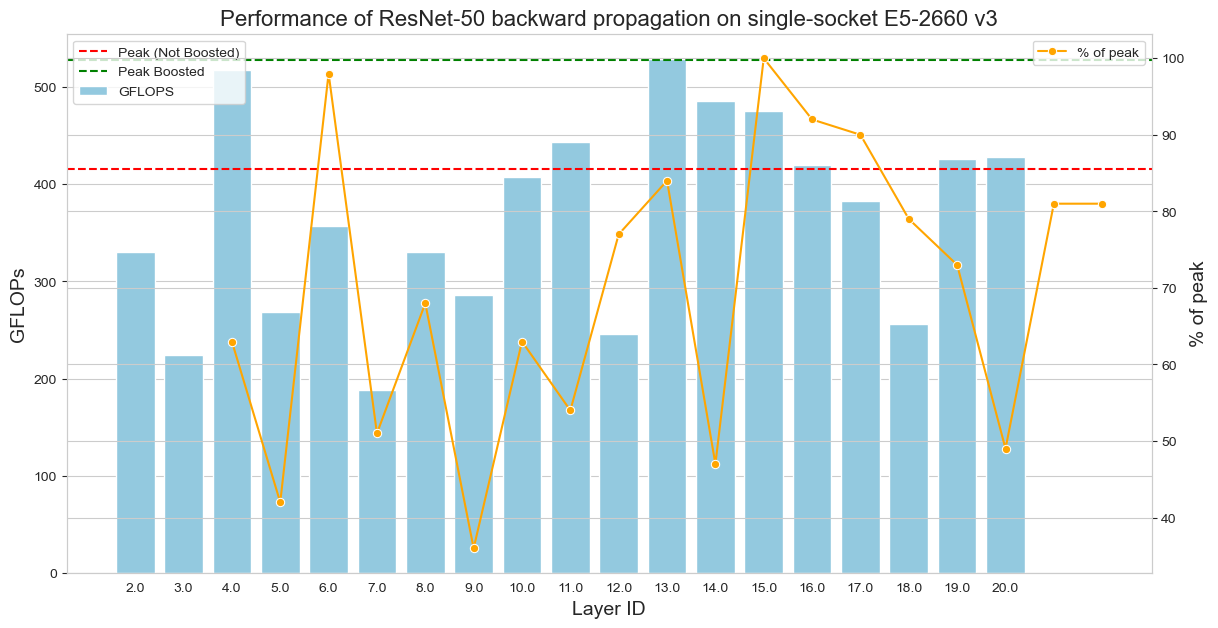

In [11]:
import pandas as pd
# Load the data
data_path = 'bwd_pass_results.csv'  # Update this path to the location of your CSV file
data = pd.read_csv(data_path)

# Data preprocessing to remove the '%' sign and convert the '% of peak' column to a float
data['% of peak'] = data['% of peak'].str.replace('%', '').astype(float)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting GFLOPs as a bar plot
sns.barplot(x='Layer ID', y='GFLOPS', data=data, ax=ax1, color='skyblue', label='GFLOPS')

# Creating a twin Axes sharing the xaxis to plot the '% of peak' line plot
ax2 = ax1.twinx()
sns.lineplot(x='Layer ID', y='% of peak', data=data, ax=ax2, color='orange', marker='o', label='% of peak')

# Setting the axis labels and title
ax1.set_xlabel('Layer ID', fontsize=14)
ax1.set_ylabel('GFLOPs', fontsize=14)
ax2.set_ylabel('% of peak', fontsize=14)
plt.title('Performance of ResNet-50 backward propagation on single-socket E5-2660 v3', fontsize=16)

# Adding horizontal lines for 'Peak (Not Boosted)' and 'Peak Boosted'
ax1.axhline(data['Peak (Not Boosted)'].iloc[0], color='red', linestyle='--', label='Peak (Not Boosted)')
ax1.axhline(data['Peak Boosted'].iloc[0], color='green', linestyle='--', label='Peak Boosted')

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()
